In [60]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

In [61]:
df = pd.read_csv('/Users/mille/Desktop/sfpd2017.csv')
df.head()

,Stop_date,Time_hour,Race_description,Ethnicity_description,Sex,Age,Stop_reason_description,Stop_search_description,Stop_result_description,Street_name,Intersection_with,Stop_district_description
0,20170101,0,Black,Non Hispanic,M,25,Traffic Violation,No Search,Citation,MISSION ST,19TH ST,Mission
1,20170101,0,Black,Non Hispanic,M,25,Traffic Violation,No Search,Warning,VAN NESS AVE,SACRAMENTO ST,Northern
2,20170101,0,Black,Non Hispanic,M,35,Traffic Violation,No Search,Warning,LOMBARD ST,FRANKLIN ST,Northern
3,20170101,0,Black,Non Hispanic,M,40,Traffic Violation,Probation/Parole/PRCS Search Condition,Warning,HYDE ST,GOLDEN GATE AVE,Tenderloin
4,20170101,0,Black,Non Hispanic,M,57,Traffic Violation,Reasonable Suspicion to Search,RWS Arrest,REVERE AVE,3RD ST,Bayview


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93459 entries, 0 to 93458
Data columns (total 12 columns):
Stop_date                    93459 non-null int64
Time_hour                    93459 non-null int64
Race_description             93459 non-null object
Ethnicity_description        93459 non-null object
Sex                          93459 non-null object
Age                          93459 non-null int64
Stop_reason_description      93459 non-null object
Stop_search_description      93459 non-null object
Stop_result_description      93459 non-null object
Street_name                  89432 non-null object
Intersection_with            77353 non-null object
Stop_district_description    93459 non-null object
dtypes: int64(3), object(9)
memory usage: 8.6+ MB


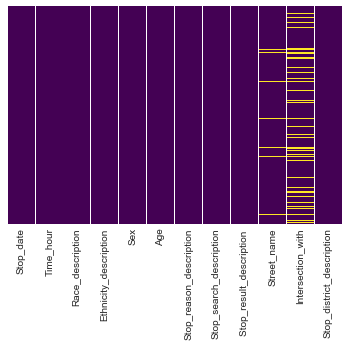

In [24]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

C:\Users\mille\Conda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


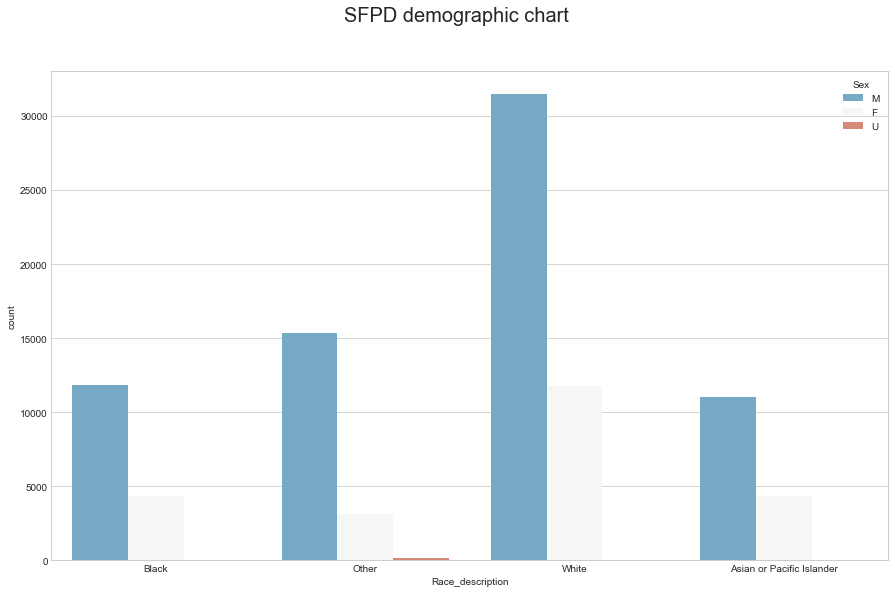

In [27]:
fig = plt.figure(figsize=(15,9))
fig.suptitle('SFPD demographic chart', fontsize=20)

sns.set_style('whitegrid')
sns.countplot(x='Race_description',hue='Sex',data=df,palette='RdBu_r')

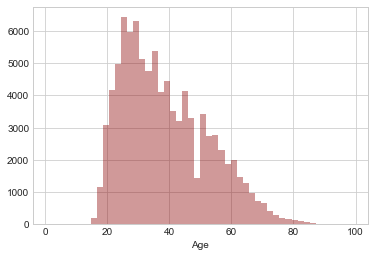

In [34]:
sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=50)

C:\Users\mille\Conda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


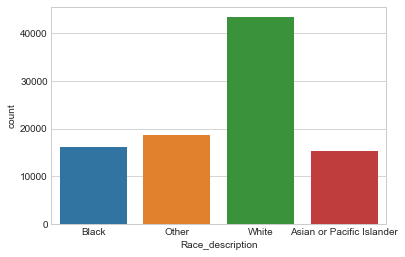

In [36]:
sns.countplot(x='Race_description',data=df)

C:\Users\mille\Conda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


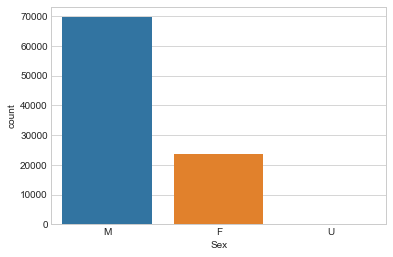

In [37]:
sns.countplot(x='Sex',data=df)

C:\Users\mille\Conda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


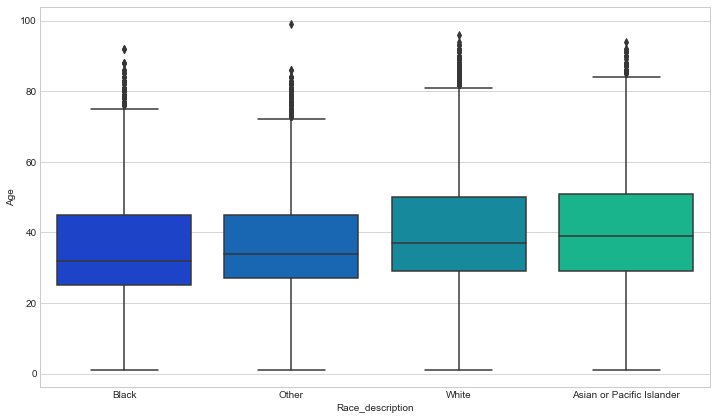

In [48]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Race_description',y='Age',data=df,palette='winter')

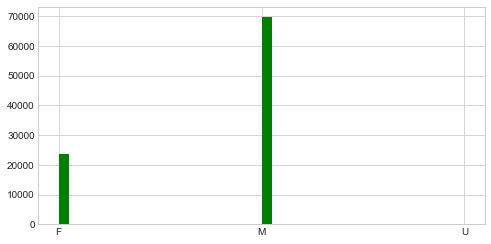

In [43]:
df['Sex'].hist(color='green',bins=40,figsize=(8,4))

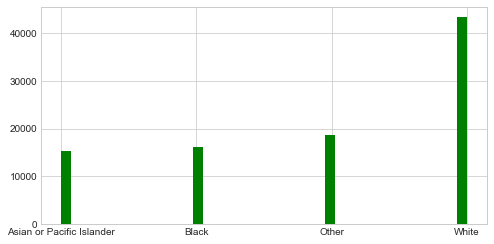

In [42]:
df['Race_description'].hist(color='green',bins=40,figsize=(8,4))

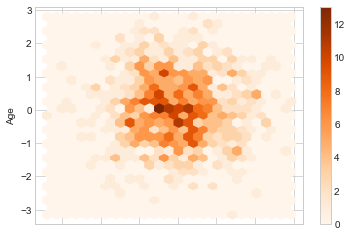

In [54]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['Race_description', 'Age'])
df.plot.hexbin(x='Race_description',y='Age',gridsize=25,cmap='Oranges') 

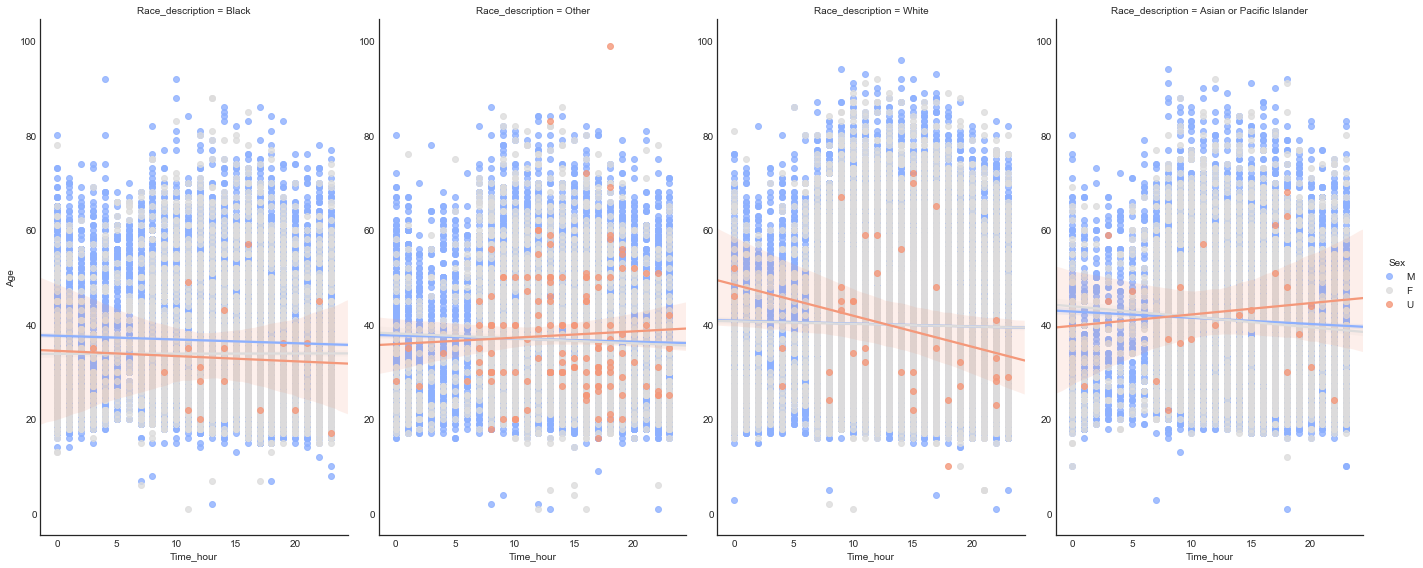

In [62]:
sns.lmplot(x='Time_hour',y='Age',data=df,col='Race_description',hue='Sex',palette='coolwarm',
          aspect=0.6,size=8)